In [6]:
import pandas
import json
import matplotlib.pyplot as plt
import sys; sys.path.append('../constituency_calculations/methods/')
import os
import pandas
from regridding import *

In [2]:
# Read climate data
eobs_df=pandas.read_csv('rcp45_climate_newconstituencies.csv')
eobs_df.set_index('constituency', inplace=True)
eobs_df

,name,prdjf_obs,prdjf_proj,prjja_obs,prjja_proj,rx5day_obs,rx5day_proj,txx_obs,txx_proj,t_obs,t_proj
constituency,,,,,,,,,,,
E14001063,Aldershot,-5.274773,9.416067,-9.424043,-1.563246,0.094544,0.988897,1.631575,0.907524,0.987676,0.758841
E14001064,Aldridge-Brownhills,-0.318522,8.905696,5.521495,-4.604797,5.527850,-1.028652,1.493197,0.881149,0.777167,0.751216
E14001065,Altrincham and Sale West,8.843328,5.392312,4.173727,-4.827185,-4.865509,1.107454,1.331575,0.788540,0.732371,0.745812
E14001066,Amber Valley,-3.904747,7.433055,10.742209,-4.087668,1.594876,0.104571,1.723990,0.837347,0.951094,0.757636
E14001067,Arundel and South Downs,11.987430,8.967330,3.518848,-1.061084,4.163788,2.306590,1.541522,0.946889,0.980302,0.759786
...,...,...,...,...,...,...,...,...,...,...,...
W07000108,Swansea West,16.128729,4.841277,17.534456,-4.071349,19.535715,-1.763286,0.835676,0.935745,0.674910,0.742634
W07000109,Torfaen,11.777202,5.787918,9.309868,-1.881366,11.048858,0.049471,0.529655,0.957121,0.585715,0.756949
W07000110,Vale of Glamorgan,13.141431,6.510239,18.568910,-3.613876,12.167041,0.541421,0.499913,0.894012,0.548650,0.749344


In [3]:
# Read ERA5 data
era5_df=pandas.read_csv('reanal_climate_newconstituencies.csv')
era5_df.set_index('constituency', inplace=True)
era5_df

,name,prdjf_proj,prdjf_reanal,prjja_proj,prjja_reanal,rx5day_proj,rx5day_reanal,txx_proj,txx_reanal,t_proj,t_reanal
constituency,,,,,,,,,,,
E14001063,Aldershot,9.416067,6.877027,-1.563246,11.394611,0.988897,1.466263,0.907524,1.525457,0.758841,0.842858
E14001064,Aldridge-Brownhills,8.905696,2.354157,-4.604797,12.126625,-1.028652,9.995131,0.881149,1.457293,0.751216,0.789562
E14001065,Altrincham and Sale West,5.392312,7.377243,-4.827185,12.645926,1.107454,4.204001,0.788540,1.082584,0.745812,0.753877
E14001066,Amber Valley,7.433055,0.875513,-4.087668,13.676989,0.104571,5.347442,0.837347,1.692561,0.757636,0.809065
E14001067,Arundel and South Downs,8.967330,10.656721,-1.061084,18.850403,2.306590,4.138793,0.946889,0.871318,0.759786,0.801264
...,...,...,...,...,...,...,...,...,...,...,...
W07000108,Swansea West,4.841277,12.165825,-4.071349,24.645836,-1.763286,12.278153,0.935745,0.581022,0.742634,0.676002
W07000109,Torfaen,5.787918,5.834145,-1.881366,22.375881,0.049471,12.284345,0.957121,0.584343,0.756949,0.705661
W07000110,Vale of Glamorgan,6.510239,8.240708,-3.613876,24.487415,0.541421,12.993750,0.894012,0.589102,0.749344,0.683647


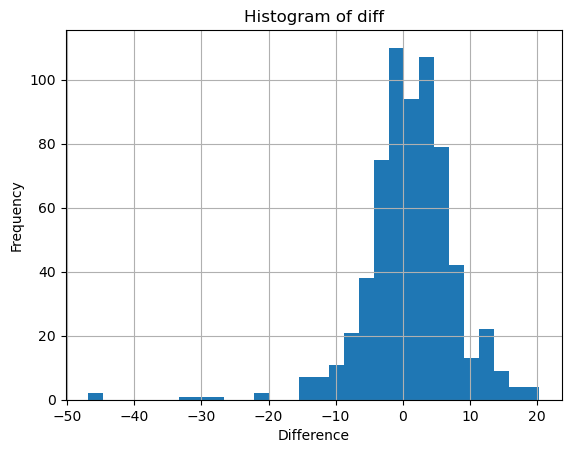

In [4]:
diff=era5_df['prdjf_reanal']-eobs_df['prdjf_obs']
diff.hist(bins=30)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of prdjf')
plt.show()


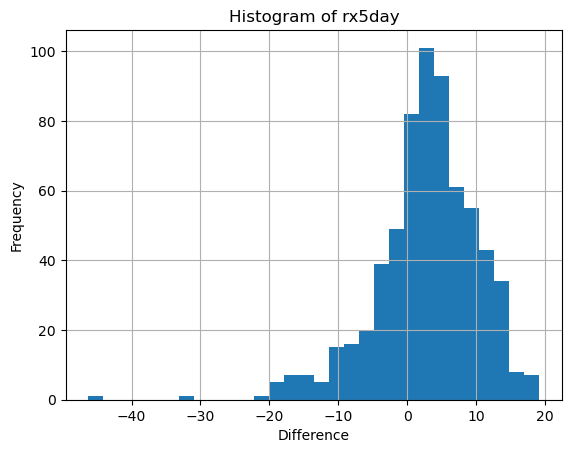

In [7]:

diff=era5_df['rx5day_reanal']-eobs_df['rx5day_obs']
diff.hist(bins=30)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of rx5day')
plt.show()



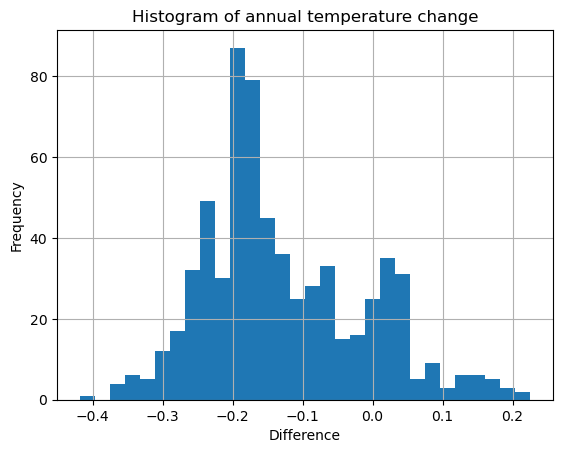

In [5]:
diff=era5_df['t_reanal']-eobs_df['t_obs']
diff.hist(bins=30)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of annual temperature change')
plt.show()


Well that's certainly making a difference. And the reanalysis dataset is systematically underplaying the amount of warming. It also has a slight preference for stronger rx5day, and there is ceratinly less noise in the individual gridpoints. That doesn't mean the E-Obs dataset is not relevant though. I think that we better look at the maps.

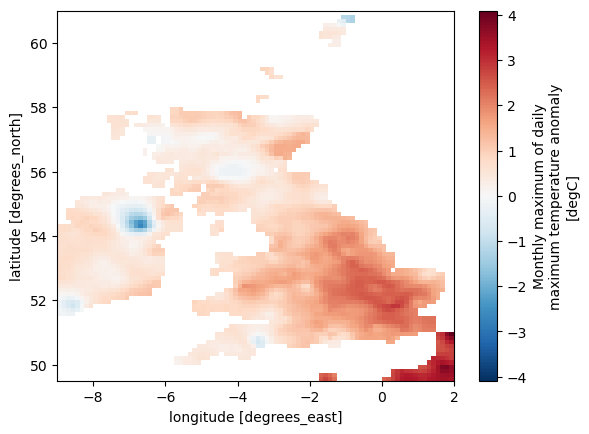

In [10]:
# Load the data
ds = xr.open_dataset('../gridded_data/Copernicus_Atlas_data/E-OBS_change_txx.nc')

# Select the 'txx' variable
txx = ds['txx_anom']

# Plot the data
txx.plot()
plt.show()

In [ ]:
#Load in the shapefile stuff...
import geopandas as gpd
# Load the shapefile
shapes = gpd.read_file('../constituency_calculations/PCON_MAY_2024_UK_BFE')
# define coordinate reference systems
osgb_crs = ccrs.TransverseMercator(approx = False, central_longitude = -2, central_latitude = 49, scale_factor = 0.9996012717, false_easting = 400000, false_northing = -100000,
                                   globe = ccrs.Globe(datum = 'OSGB36', ellipse = 'airy'))
latlon_crs = ccrs.RotatedPole(central_rotated_longitude = 180)

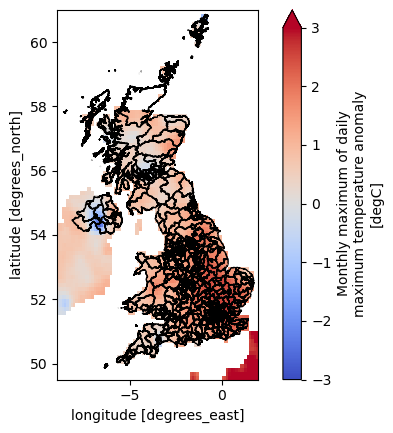

In [20]:
#Create a plot of the data with the shapefile overlaid on it.

txx.plot(vmin=-3, vmax=3, cmap='coolwarm')
# Overplot the shapes
shapes_latlon = shapes.to_crs(latlon_crs.proj4_init)

# Plot the shapes with 'txx_obs' as the face color
shapes_latlon.plot(ax=plt.gca(), facecolor='none', edgecolor='black')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

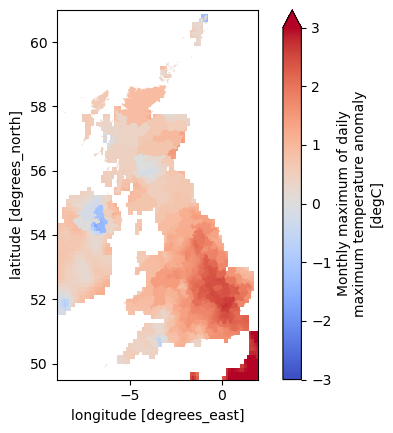

In [28]:
#Now try that with the shapes colored by the computed constituency data
import matplotlib.colors as mcolors
txx.plot(vmin=-3, vmax=3, cmap='coolwarm')
txx_obs_norm = (eobs_df['txx_obs'] + 3 ) / (6)
cmap=plt.get_cmap('coolwarm')
colors=cmap(txx_obs_norm)

shapes_latlon.plot(ax=plt.gca(), facecolor=colors, edgecolor='none')
#for color, (shape_id, shape) in zip(colors, shapes_latlon.iterrows()):
#    shape.plot(ax=plt.gca(), facecolor=mcolors.rgb2hex(color), edgecolor='black')

plt.show

#### Well that actually seems to be showing exactly what I was hoping it would show. I'm not going to check with the rx5day variable to see if that's showing the same behaviour

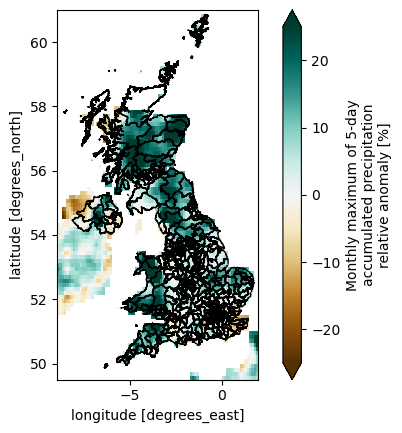

In [29]:
ds = xr.open_dataset('../gridded_data/Copernicus_Atlas_data/E-OBS_change_rx5day.nc')
rx5day = ds['rx5day_relanom']
rx5day.plot(vmin=-25, vmax=25, cmap='BrBG')
# Overplot the shapes
shapes_latlon = shapes.to_crs(latlon_crs.proj4_init)
# Plot the shapes with 'txx_obs' as the face color
shapes_latlon.plot(ax=plt.gca(), facecolor='none', edgecolor='black')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

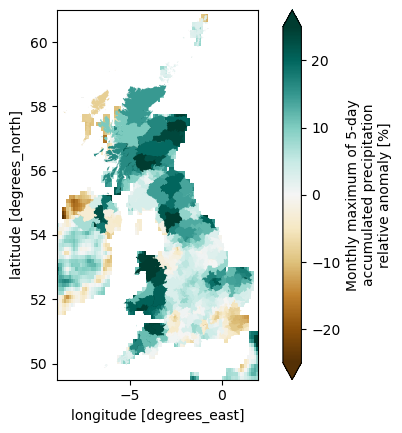

In [30]:
rx5day.plot(vmin=-25, vmax=25, cmap='BrBG')
rx5day_obs_norm = (eobs_df['rx5day_obs'] + 25 ) / (50)
cmap=plt.get_cmap('BrBG')
colors=cmap(rx5day_obs_norm)
shapes_latlon.plot(ax=plt.gca(), facecolor=colors, edgecolor='none')
plt.show

#### OK. That also seems to doing exactly what I was intending. So having churned through the ERA5-Land dataset. I don't think that we want to change of the visualised hexmap. It feels marginally more legitimate to have a dataset with some missing data in the Scottish Highlands (that have minimal impact of on the message of the plot), than to refer to the reanalysis as "observations" and deal with that fall out of having the noisy obsered signal smoothed by the data assimilated and IFS model.